### Work notebook

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, plot_roc_curve, classification_report

from sklearn.dummy import DummyClassifier, DummyRegressor

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
!ls

README.md
Work notebook.ipynb
data
index.ipynb


In [3]:
churn_data = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')

In [4]:
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Work notebook

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, plot_roc_curve, classification_report

from sklearn.dummy import DummyClassifier, DummyRegressor

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

In [2]:
!ls

README.md
Work notebook.ipynb
data
index.ipynb


In [3]:
churn_data = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')

In [4]:
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
!ls

README.md
Work notebook.ipynb
data
index.ipynb


In [3]:
churn_data = pd.read_csv('./data/bigml_59c28831336c6604c800002a.csv')

In [4]:
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
churn_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Checking column names and if there are any null values/data that needs to be transformed

In [7]:
churn_data['churn'].value_counts(normalize = True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Seems like the data may be quite imbalanced, I will explore that later in the notebook

In [8]:
churn_data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

Seeing what the values for international plan are

In [9]:
X = churn_data.drop(['phone number','churn'], axis = 1)
y = churn_data.churn

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [10]:
X_train.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 427 to 2732
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2499 non-null   object 
 1   account length          2499 non-null   int64  
 2   area code               2499 non-null   int64  
 3   international plan      2499 non-null   object 
 4   voice mail plan         2499 non-null   object 
 5   number vmail messages   2499 non-null   int64  
 6   total day minutes       2499 non-null   float64
 7   total day calls         2499 non-null   int64  
 8   total day charge        2499 non-null   float64
 9   total eve minutes       2499 non-null   float64
 10  total eve calls         2499 non-null   int64  
 11  total eve charge        2499 non-null   float64
 12  total night minutes     2499 non-null   float64
 13  total night calls       2499 non-null   int64  
 14  total night charge      2499 non-null 

Double checking the split to make sure it looks correct

In [12]:
cat_cols = ['state', 'international plan', 'voice mail plan','area code']

In [13]:
numeric_cols = ['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']

In [14]:
subpipe_numeric = Pipeline(steps =[
    ('num_impute', SimpleImputer()),
    ('ss', StandardScaler())
])

subpipe_cat = Pipeline(steps = [
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse = False, handle_unknown='ignore'))
])

In [15]:
CT = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric,numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols)
])

In [16]:
dummy_model_pipe = Pipeline([
    ('ct',CT),
    ('dummy', DummyClassifier(strategy = 'most_frequent'))
])

In [17]:
dummy_model_pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
              

In [18]:
dummy_model_pipe.score(X_train, y_train)

0.8527410964385754

In [19]:
dummy_model_pipe.score(X_test, y_test)

0.8621103117505995

<AxesSubplot:>

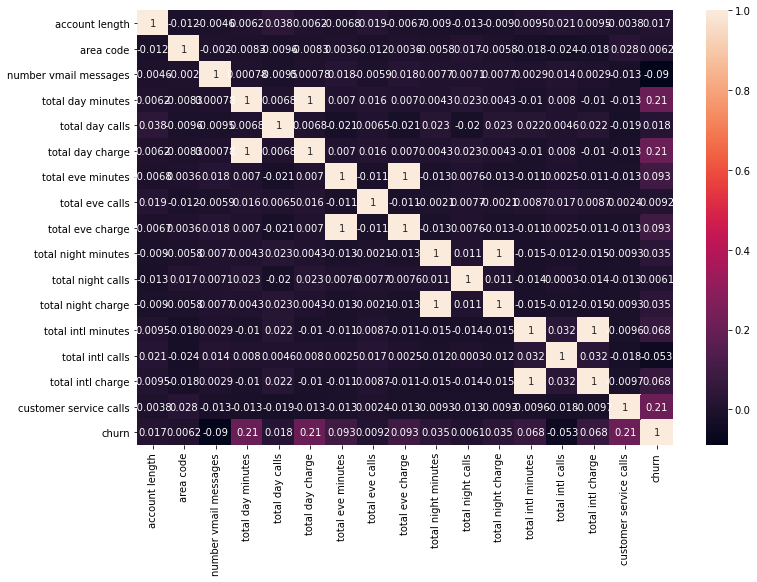

In [20]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(churn_data.drop(['state', 'international plan', 'voice mail plan'], axis = 1).corr(), annot = True)

From the first glance it seems like churn doesn't have any especially strong correlations it seems it's most positively correlated with them calling into the service and negatively correclated with how many vmail messages they have as well as the total amount of international calls they are making.

In [21]:
logreg = Pipeline(steps = [
    ('ct', CT),
    ('logreg', LogisticRegression())
])

In [22]:
logreg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
              

In [23]:
logreg.score(X_train, y_train)

0.8711484593837535

In [24]:
logreg.score(X_test, y_test)

0.8513189448441247

In [25]:
logreg.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
              

Seems like the model may be a tad overfit, it may be because we have the state columns as well as the Area code columns, I'll try another model without the states to see if that helps the test data.

In [26]:
cat_cols

['state', 'international plan', 'voice mail plan', 'area code']

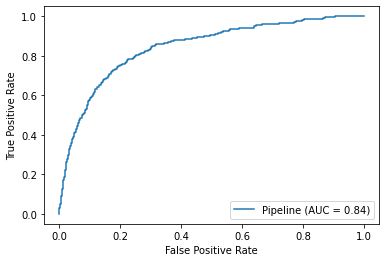

In [27]:
plot_roc_curve(baseline_model, X_train, y_train)

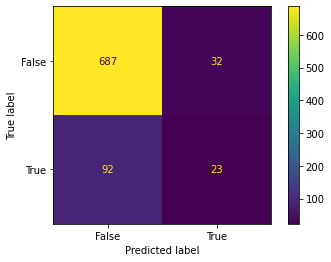

In [28]:
plot_confusion_matrix(baseline_model, X_test, y_test)

In [29]:
print(classification_report(y_test, baseline_model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       719
        True       0.42      0.20      0.27       115

    accuracy                           0.85       834
   macro avg       0.65      0.58      0.59       834
weighted avg       0.82      0.85      0.83       834



Not a great recall score, I think we should err on the side of caution and try to identify as many cases as churn as possible without drastically decreasing our accuracy score to prevent as many people as possible from leaving the service by perhaps offering incentives on the positively correlated items that seem to have people leave the service

In [30]:
ohe_no_states = OneHotEncoder(drop = 'first')

In [31]:
cv_results = cross_validate(
                    estimator=baseline_model,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

cv_results['train_score']

array([0.86993497, 0.87593797, 0.86943472, 0.87293647, 0.874     ])

In [32]:
cv_results = cross_validate(
                    estimator=baseline_model,
                    X=X_test,
                    y=y_test,
                    cv=5,
                    return_train_score=True
)

cv_results['train_score']

array([0.88155922, 0.88455772, 0.89505247, 0.89205397, 0.88622754])

In [33]:
cat_cols_no_states = cat_cols[1:]

In [34]:
CT_no_states = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric,numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols_no_states)
])

In [35]:
logreg_no_states = Pipeline([
    ('ct', CT_no_states),
    ('logreg', LogisticRegression())
])

In [36]:
logreg_no_states.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
              

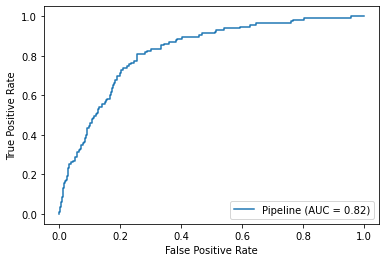

In [144]:
plot_roc_curve(logreg_no_states, X_test, y_test)

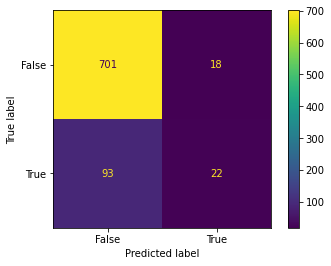

In [38]:
plot_confusion_matrix(logreg_no_states, X_test, y_test)

In [39]:
print(classification_report(y_test, logreg_no_states.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93       719
        True       0.55      0.19      0.28       115

    accuracy                           0.87       834
   macro avg       0.72      0.58      0.61       834
weighted avg       0.84      0.87      0.84       834



In [40]:
cv_results = cross_validate(
                    estimator=logreg_no_states,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

cv_results['train_score']

array([0.85642821, 0.86143072, 0.85442721, 0.86443222, 0.8615    ])

Seems like states help with our graph even though they add a lot of additional columns

<AxesSubplot:>

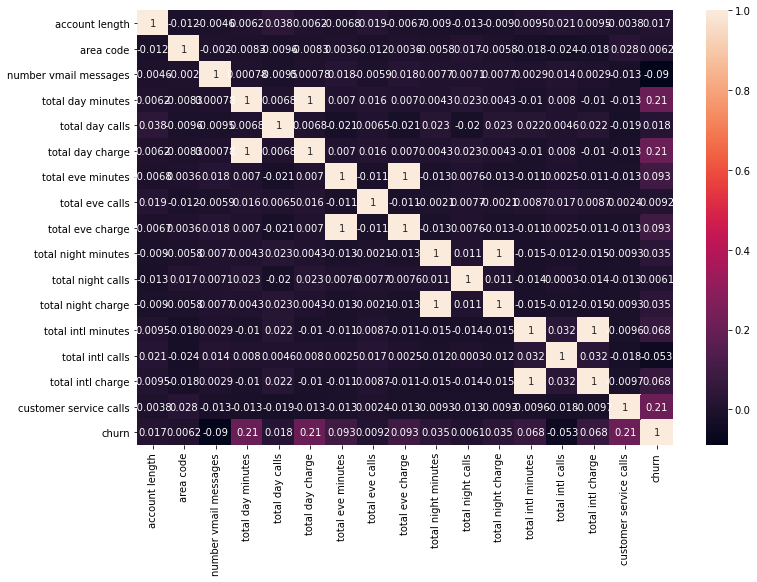

In [41]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(churn_data.drop(['state', 'international plan', 'voice mail plan'], axis = 1).corr(), annot = True)

To try and improve recall I'll make a logistic regression model using the highest postively correlated values and highest negatively correlated values

In [42]:
strong_numeric_cols = ['total day minutes', 'total day charge', 'total eve minutes','total eve charge',
                       'customer service calls','number vmail messages', 'total intl calls']

In [43]:
CT_strong = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric,strong_numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols)
])

In [44]:
logreg_recall = Pipeline([
    ('ct',CT_strong),
    ('logreg', LogisticRegression())
])

In [45]:
logreg_recall.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['total day minutes',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve charge',
                                                   'customer service calls',
                                                   'number vmail messages',
                                                   'total intl calls']),
                                                 ('subpipe_cat',
        

In [46]:
cv_results = cross_validate(
                    estimator=logreg_recall,
                    X=X_train,
                    y=y_train,
                    cv=5,
                    return_train_score=True
)

cv_results['train_score']

array([0.86893447, 0.86943472, 0.87043522, 0.87043522, 0.87      ])

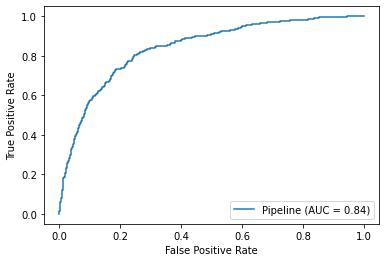

In [47]:
plot_roc_curve(logreg_recall, X_train, y_train)

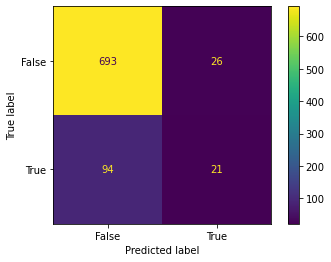

In [48]:
plot_confusion_matrix(logreg_recall, X_test, y_test)

In [49]:
print(classification_report(y_test, logreg_recall.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       719
        True       0.45      0.18      0.26       115

    accuracy                           0.86       834
   macro avg       0.66      0.57      0.59       834
weighted avg       0.82      0.86      0.83       834



Seems like it had the opposite effect, I will try doing a polynomial features on the columns to see if that increases the recall at all.

In [50]:
model_less_regularization = Pipeline([
    ('ct', CT),
    ('logreg',LogisticRegression(C=1e12, random_state=0, class_weight={1:0.28}))
])

In [51]:
model_less_regularization.fit(X_train,y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
              

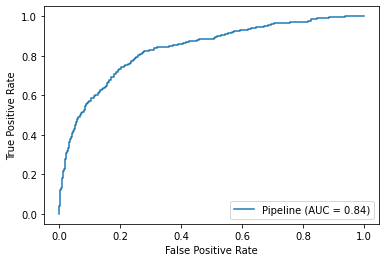

In [52]:
plot_roc_curve(model_less_regularization, X_train, y_train)

In [53]:
subpipe_numeric_pf = Pipeline(steps =[
    ('num_impute', SimpleImputer()),
    ('ss', StandardScaler()),
    ('pf', PolynomialFeatures())
])


In [54]:
CT_pf = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric_pf,numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols)
])

In [55]:
logreg_pf = Pipeline(steps = [
    ('ct',CT_pf),
    ('logreg', LogisticRegression())
])

In [56]:
logreg_pf.fit(X_train,y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve mi

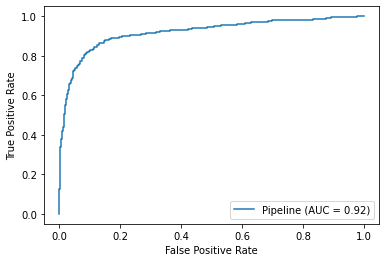

In [57]:
plot_roc_curve(logreg_pf, X_train, y_train)

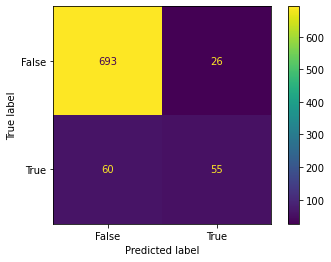

In [58]:
plot_confusion_matrix(logreg_pf, X_test, y_test)

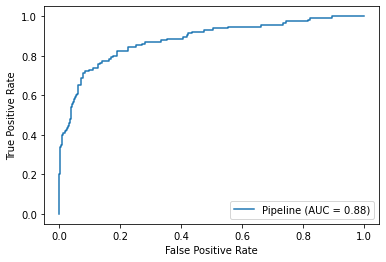

In [59]:
plot_roc_curve(logreg_pf, X_test, y_test)

In [60]:
print(classification_report(y_test, logreg_pf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94       719
        True       0.68      0.48      0.56       115

    accuracy                           0.90       834
   macro avg       0.80      0.72      0.75       834
weighted avg       0.89      0.90      0.89       834



Wow, these polynomial features have more than doubled the recall and also increased the accuracy, I'll try increasing the degrees one more time

In [61]:
subpipe_numeric_pf2 = Pipeline(steps =[
    ('num_impute', SimpleImputer()),
    ('ss', StandardScaler()),
    ('pf', PolynomialFeatures(degree = 3))
])


In [62]:
CT_pf2 = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric_pf2,numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols)
])

In [63]:
logreg_pf2 = Pipeline([
    ('ct',CT_pf2),
    ('logreg', LogisticRegression())
])

In [64]:
logreg_pf2.fit(X_train, y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'tota

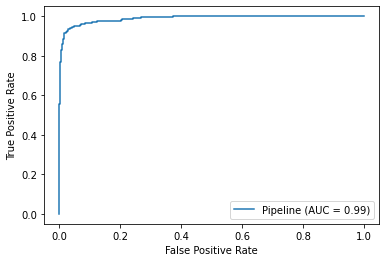

In [65]:
plot_roc_curve(logreg_pf2, X_train, y_train)

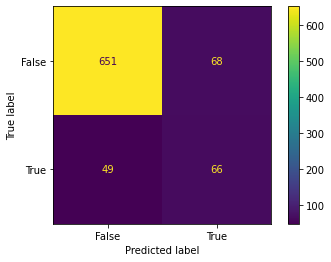

In [66]:
plot_confusion_matrix(logreg_pf2, X_test, y_test)

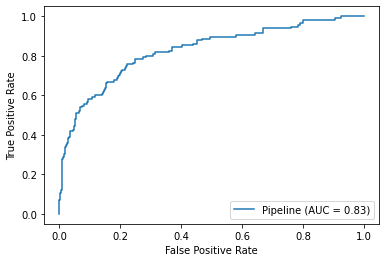

In [67]:
plot_roc_curve(logreg_pf2, X_test, y_test)

In [68]:
print(classification_report(y_test, logreg_pf2.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.91      0.92       719
        True       0.49      0.57      0.53       115

    accuracy                           0.86       834
   macro avg       0.71      0.74      0.72       834
weighted avg       0.87      0.86      0.86       834



A degree of 3 seems to be a good point as the accuracy is starting to decrease and recall didn't increase as much between these two values, for fun let's go one step deeper tho

In [69]:
classifier = logreg_pf2.named_steps['logreg']

In [70]:
classifier.coef_[0]

array([-8.03875019e-01,  5.27790197e-01,  8.96075780e-01, -4.76334078e-01,
        6.10897725e-02, -4.76575344e-01,  4.71275053e-01,  6.32895791e-01,
        4.71829100e-01, -6.20439356e-01, -1.64140287e-02, -6.23256763e-01,
        5.86064552e-01, -6.54528955e-01,  6.03376634e-01, -7.24063326e-01,
       -6.75757077e-01, -6.46306497e-01,  8.08858017e-02,  3.08657252e-01,
        8.38625570e-02,  6.38666225e-02,  3.96399558e-02,  6.12915425e-02,
       -3.91396409e-01,  5.66091237e-02, -3.91811658e-01, -1.14538147e-01,
        1.66187165e-02, -1.15565913e-01,  1.18693666e-02,  8.29418245e-01,
       -3.35278345e-01, -2.86040282e-01, -3.35672062e-01, -7.92409155e-01,
       -7.23893451e-01, -7.93242188e-01, -8.69398641e-01,  6.52223439e-01,
       -8.67182381e-01,  1.05033545e-01,  9.07963897e-01,  8.86991408e-02,
        8.13577941e-01,  2.57665733e-01,  7.97185892e-02,  2.58173105e-01,
        3.63658953e-01, -3.29639897e-01,  3.64284588e-01,  2.27421032e-01,
       -2.23176362e-01,  

In [71]:
subpipe_numeric_pf3 = Pipeline(steps =[
    ('num_impute', SimpleImputer()),
    ('ss', StandardScaler()),
    ('pf', PolynomialFeatures(degree = 4))
])


In [72]:
CT_pf3 = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric_pf3,numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols)
])

In [73]:
logreg_pf3 = Pipeline([
    ('ct',CT_pf3),
    ('logreg', LogisticRegression(C = .0001))
])

In [74]:
logreg_pf3.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures(degree=4))]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'tota

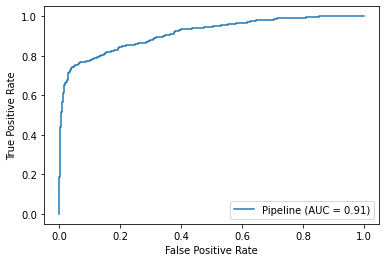

In [75]:
plot_roc_curve(logreg_pf3, X_train, y_train)

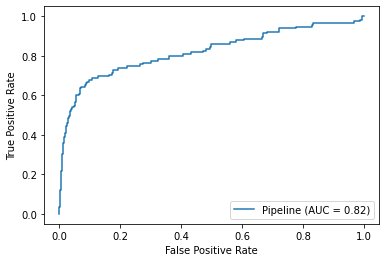

In [76]:
plot_roc_curve(logreg_pf3, X_test, y_test)

In [77]:
print(classification_report(y_test, logreg_pf3.predict(X_test)))

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       719
        True       0.82      0.32      0.46       115

    accuracy                           0.90       834
   macro avg       0.86      0.66      0.70       834
weighted avg       0.89      0.90      0.88       834



Seems like we should stick with a maximum degree of 3

In [78]:
logreg_pf2_more_regularization = Pipeline([
    ('ct',CT_pf2),
    ('logreg', LogisticRegression(C = .1))
])

In [79]:
logreg_pf2_more_regularization.fit(X_train,y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'tota

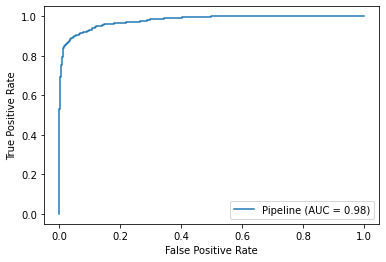

In [80]:
plot_roc_curve(logreg_pf2_more_regularization, X_train, y_train)

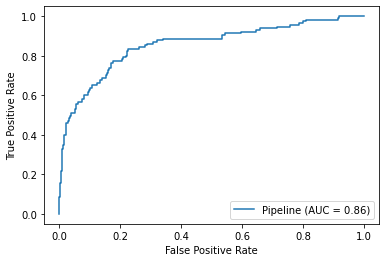

In [81]:
plot_roc_curve(logreg_pf2_more_regularization, X_test, y_test)

In [82]:
print(classification_report(y_test, logreg_pf2_more_regularization.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93       719
        True       0.58      0.57      0.57       115

    accuracy                           0.88       834
   macro avg       0.75      0.75      0.75       834
weighted avg       0.88      0.88      0.88       834



In [83]:
grid = {
    'logreg__penalty' : ['none','l1','l2'],
    'logreg__max_iter' : [10,100,1000],
    'logreg__C' : [0.000001, 0.00001, 0.0001, 0.001, 10, 100 ],
    'logreg__tol' : [.0001, .001, .01, .1]
}

In [84]:
#gs = GridSearchCV(logreg_pf2_more_regularization, param_grid = grid, verbose =1 )

In [85]:
#gs.fit(X_train, y_train)

In [86]:
#print(gs.best_params_)
#print(gs.best_score_)

In [87]:
grid2 = {
    'logreg__penalty' : ['none','l1','l2','elasticnet'],
    'logreg__max_iter' : [10,100,1000],
    'logreg__C' : [0.000001, 0.00001, 0.0001, 0.001],
    'logreg__tol' : [.0001, .001, .01, .1],
    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [88]:
# gs.score(X_train, y_train)

In [89]:
# gs.score(X_test, y_test)

In [90]:
# gs2 = GridSearchCV(logreg_pf2_more_regularization, param_grid = grid2, verbose =1, cv = 3)

In [91]:
# gs2.fit(X_train,y_train)

In [92]:
# print(gs2.best_params_)
# print(gs2.best_score_)

In [93]:
CT_cols = ColumnTransformer(transformers=[
    ('num_cols',subpipe_numeric_pf2, numeric_cols),
    ('ohe', OneHotEncoder(), cat_cols)
])

In [94]:
newreg = Pipeline([
    ('ct', CT_cols),
    ('logreg', LogisticRegression())
])

In [95]:
CT_cols.fit(X_train)

ColumnTransformer(transformers=[('num_cols',
                                 Pipeline(steps=[('num_impute',
                                                  SimpleImputer()),
                                                 ('ss', StandardScaler()),
                                                 ('pf',
                                                  PolynomialFeatures(degree=3))]),
                                 ['account length', 'number vmail messages',
                                  'total day minutes', 'total day calls',
                                  'total day charge', 'total eve minutes',
                                  'total eve calls', 'total eve charge',
                                  'total night minutes', 'total night calls',
                                  'total night charge', 'total intl minutes',
                                  'total intl calls', 'total intl charge',
                                  'customer service calls']),
                 

In [96]:
newreg.fit(X_train,y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total e

In [107]:
CT_pf = ColumnTransformer(transformers = [
    ('subpipe_num', subpipe_numeric_pf,numeric_cols),
    ('subpipe_cat', subpipe_cat, cat_cols)
])

In [111]:
lasso = LogisticRegression()

In [112]:
logreg_pf = Pipeline(steps = [
    ('ct',CT_pf),
    ('logreg', lasso)
])

In [114]:
logreg_pf.fit(X_train, y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve mi

In [115]:
categorical_feature_names = CT_pf.named_transformers_['subpipe_cat'].named_steps['ohe'].get_feature_names(input_features = cat_cols)
categorical_feature_names

array(['state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
       'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'international plan_no', 'international plan_yes',
       'voice mail plan_no', 'voice mail plan_yes', 'area code_408',
       'area code_415', 'area code_510'], dtype=object)

In [116]:
poly_feature_names = CT_pf.named_transformers_['subpipe_num'].named_steps['pf'].get_feature_names(input_features = numeric_cols)

In [117]:
allcols = poly_feature_names + list(categorical_feature_names)

In [118]:
coefs = LogisticRegression()

In [136]:
pflist = list(zip(allcols, (np.exp(logreg_pf.named_steps['logreg'].coef_[0]) - 1)  *100))
sorted(pflist,key = lambda x:x[1])

[('international plan_no', -74.18933193439783),
 ('state_HI', -73.14575743625949),
 ('state_VT', -62.260026072332174),
 ('state_AK', -50.03269737335461),
 ('state_AZ', -47.83689593781262),
 ('voice mail plan_yes', -45.64119703778737),
 ('state_NM', -43.46671922599612),
 ('state_UT', -39.97774883085352),
 ('state_AL', -39.60448168674764),
 ('state_NC', -37.16403146108757),
 ('state_IL', -36.392161741164784),
 ('state_VA', -36.162591354776765),
 ('state_FL', -36.058990216148565),
 ('state_CO', -35.929461361583094),
 ('total intl calls', -34.4959145453973),
 ('state_DC', -33.03044668201473),
 ('state_WV', -32.75866071659983),
 ('state_WI', -31.47805849270654),
 ('state_ND', -30.42181066438391),
 ('total day minutes customer service calls', -30.108474749752567),
 ('total day charge customer service calls', -29.261344880779085),
 ('state_WY', -28.062670043073933),
 ('state_DE', -26.885463461550387),
 ('state_RI', -23.566426215000757),
 ('number vmail messages total day minutes', -21.6786396

In [121]:
len(poly_feature_names)

136

In [122]:
logreg_pf_gs = Pipeline([
    ('ct',CT_pf),
    ('logreg', LogisticRegression(C = 1e-05, max_iter= 100, penalty= 'none', solver= 'sag', tol= 0.0001))
])

In [123]:
logreg_pf_gs.fit(X_train, y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve mi

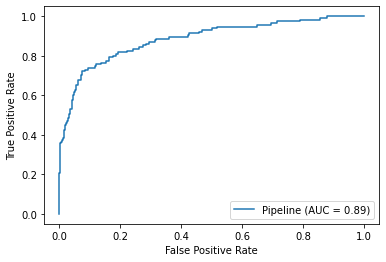

In [124]:
plot_roc_curve(logreg_pf_gs, X_test, y_test)

In [125]:
print(classification_report(y_test, logreg_pf_gs.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       719
        True       0.69      0.51      0.59       115

    accuracy                           0.90       834
   macro avg       0.81      0.74      0.77       834
weighted avg       0.89      0.90      0.90       834



In [126]:
logreg_pf2_gs = Pipeline([
    ('ct',CT_pf2),
    ('logreg', LogisticRegression(C = 1e-05, max_iter= 100, penalty= 'none', solver= 'sag', tol= 0.0001))
])

In [127]:
logreg_pf2_gs.fit(X_train,y_train)

C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rchag\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler()),
                                                                  ('pf',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'tota

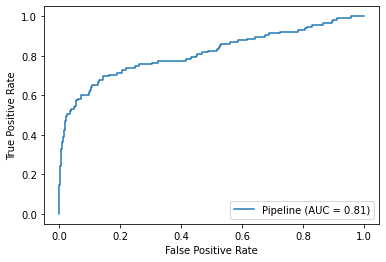

In [128]:
plot_roc_curve(logreg_pf2_gs, X_test, y_test)

In [129]:
print(classification_report(y_test, logreg_pf2_gs.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95       719
        True       0.73      0.50      0.60       115

    accuracy                           0.91       834
   macro avg       0.83      0.74      0.77       834
weighted avg       0.90      0.91      0.90       834



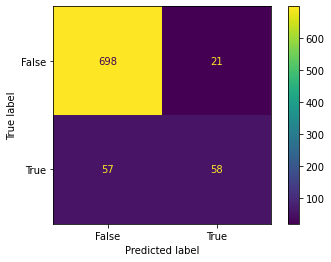

In [143]:
plot_confusion_matrix(logreg_pf2_gs, X_test, y_test)